## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

In [2]:
df = pd.read_csv(r"D:\aegis\Advance Python\Air_quality_index.csv")

In [3]:
df.drop("Unnamed: 0",axis =1,inplace = True)

In [4]:
df

,T,TM,tm,H,PP,VV,V,VM,PM25
0,23.1,27.3,17.0,60,0.00,1.9,8.9,20.6,163
1,23.6,27.6,18.0,65,0.00,1.8,5.7,14.8,165
2,24.0,29.0,18.4,65,0.00,1.8,6.7,18.3,170
3,24.9,30.3,18.3,49,0.00,1.9,6.3,16.5,164
4,25.1,31.2,16.0,43,0.00,2.1,6.3,16.5,169
...,...,...,...,...,...,...,...,...,...
3690,30.5,34.0,28.0,92,0.00,3.7,6.9,16.5,51
3691,30.9,35.0,27.6,91,0.00,3.4,6.5,16.5,56
3692,30.0,34.0,27.1,90,4.06,3.4,9.6,22.2,29
3693,30.1,35.0,28.0,90,0.00,3.2,11.1,22.2,13


In [5]:
df.head()

,T,TM,tm,H,PP,VV,V,VM,PM25
0,23.1,27.3,17.0,60,0.0,1.9,8.9,20.6,163
1,23.6,27.6,18.0,65,0.0,1.8,5.7,14.8,165
2,24.0,29.0,18.4,65,0.0,1.8,6.7,18.3,170
3,24.9,30.3,18.3,49,0.0,1.9,6.3,16.5,164
4,25.1,31.2,16.0,43,0.0,2.1,6.3,16.5,169


In [6]:
df.isna().sum()

T       0
TM      0
tm      0
H       0
PP      0
VV      0
V       0
VM      0
PM25    0
dtype: int64

In [7]:
df.describe()

,T,TM,tm,H,PP,VV,V,VM,PM25
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000
mean,26.446820,31.906414,21.212882,65.758593,2.725502,3.743464,8.648633,17.646847,128.872260
std,4.931379,4.892202,5.355058,17.044757,15.450113,1.703215,4.463831,7.962237,69.881704
min,8.000000,10.000000,3.000000,12.000000,0.000000,0.200000,0.200000,1.900000,2.000000
25%,23.600000,29.000000,18.100000,54.000000,0.000000,2.650000,5.200000,13.000000,77.000000
50%,27.500000,32.000000,21.800000,68.000000,0.000000,3.200000,8.300000,18.300000,119.000000
75%,29.800000,35.000000,25.400000,79.000000,0.000000,4.300000,11.100000,22.200000,165.000000
max,38.800000,47.600000,33.300000,99.000000,374.900000,8.900000,27.000000,81.300000,637.000000


## Plotting

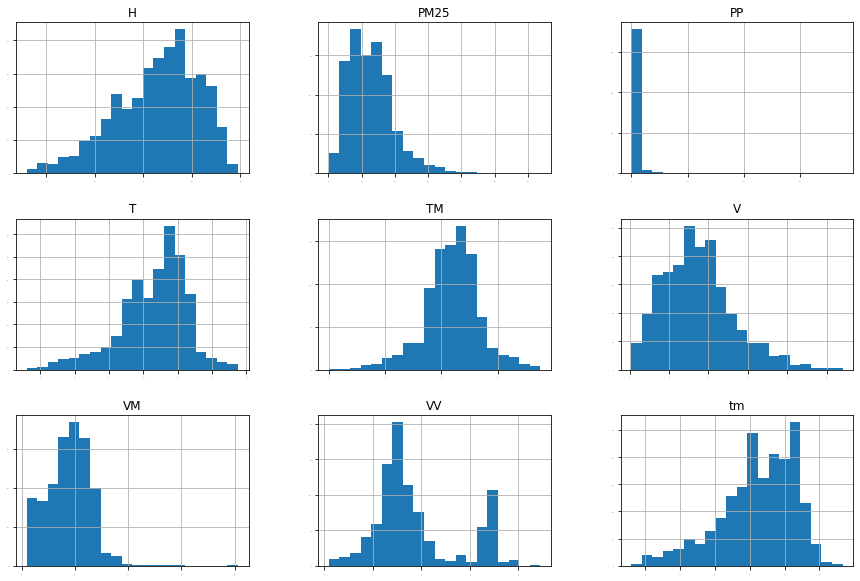

In [8]:
df.hist(xlabelsize=1, ylabelsize=1,figsize=(15,10),bins=20)
plt.show()

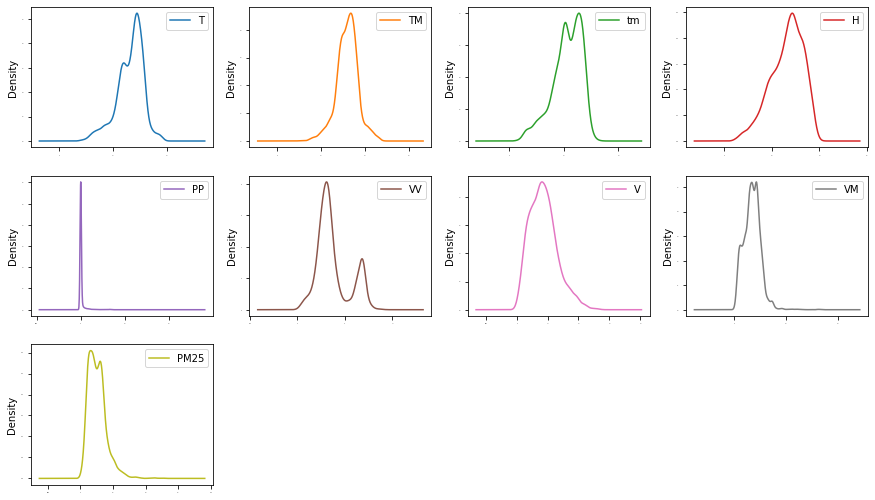

In [9]:
df.plot(kind='density', subplots=True, layout=(5,4),fontsize=1, figsize=(15,15),sharex=False, legend=True,)
plt.show()

In [10]:
df.corr().round(2)

,T,TM,tm,H,PP,VV,V,VM,PM25
T,1.00,0.92,0.91,-0.19,-0.00,0.08,0.39,0.36,-0.44
TM,0.92,1.00,0.74,-0.43,-0.06,0.10,0.24,0.25,-0.30
tm,0.91,0.74,1.00,0.16,0.06,0.14,0.42,0.33,-0.57
H,-0.19,-0.43,0.16,1.00,0.20,-0.12,0.20,0.12,-0.24
PP,-0.00,-0.06,0.06,0.20,1.00,-0.03,0.08,0.06,-0.13
VV,0.08,0.10,0.14,-0.12,-0.03,1.00,-0.30,-0.43,-0.47
V,0.39,0.24,0.42,0.20,0.08,-0.30,1.00,0.78,-0.27
VM,0.36,0.25,0.33,0.12,0.06,-0.43,0.78,1.00,-0.13
PM25,-0.44,-0.30,-0.57,-0.24,-0.13,-0.47,-0.27,-0.13,1.00


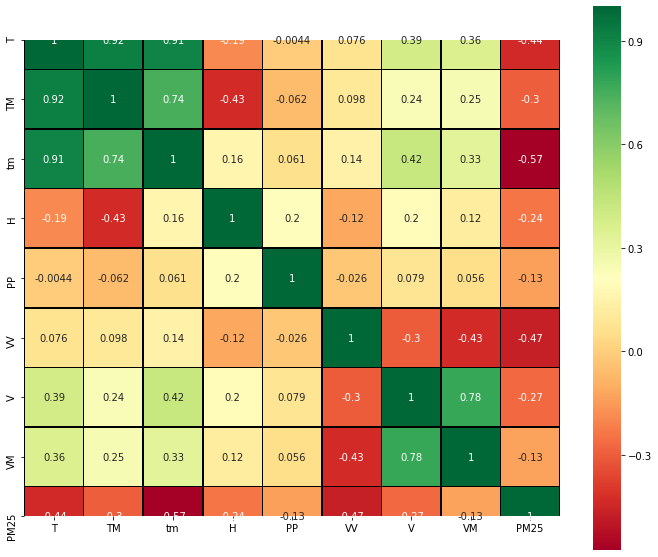

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr,square=True, ax=ax,cmap= 'RdYlGn', linewidths=0.50, linecolor='black',annot=True)
plt.show()

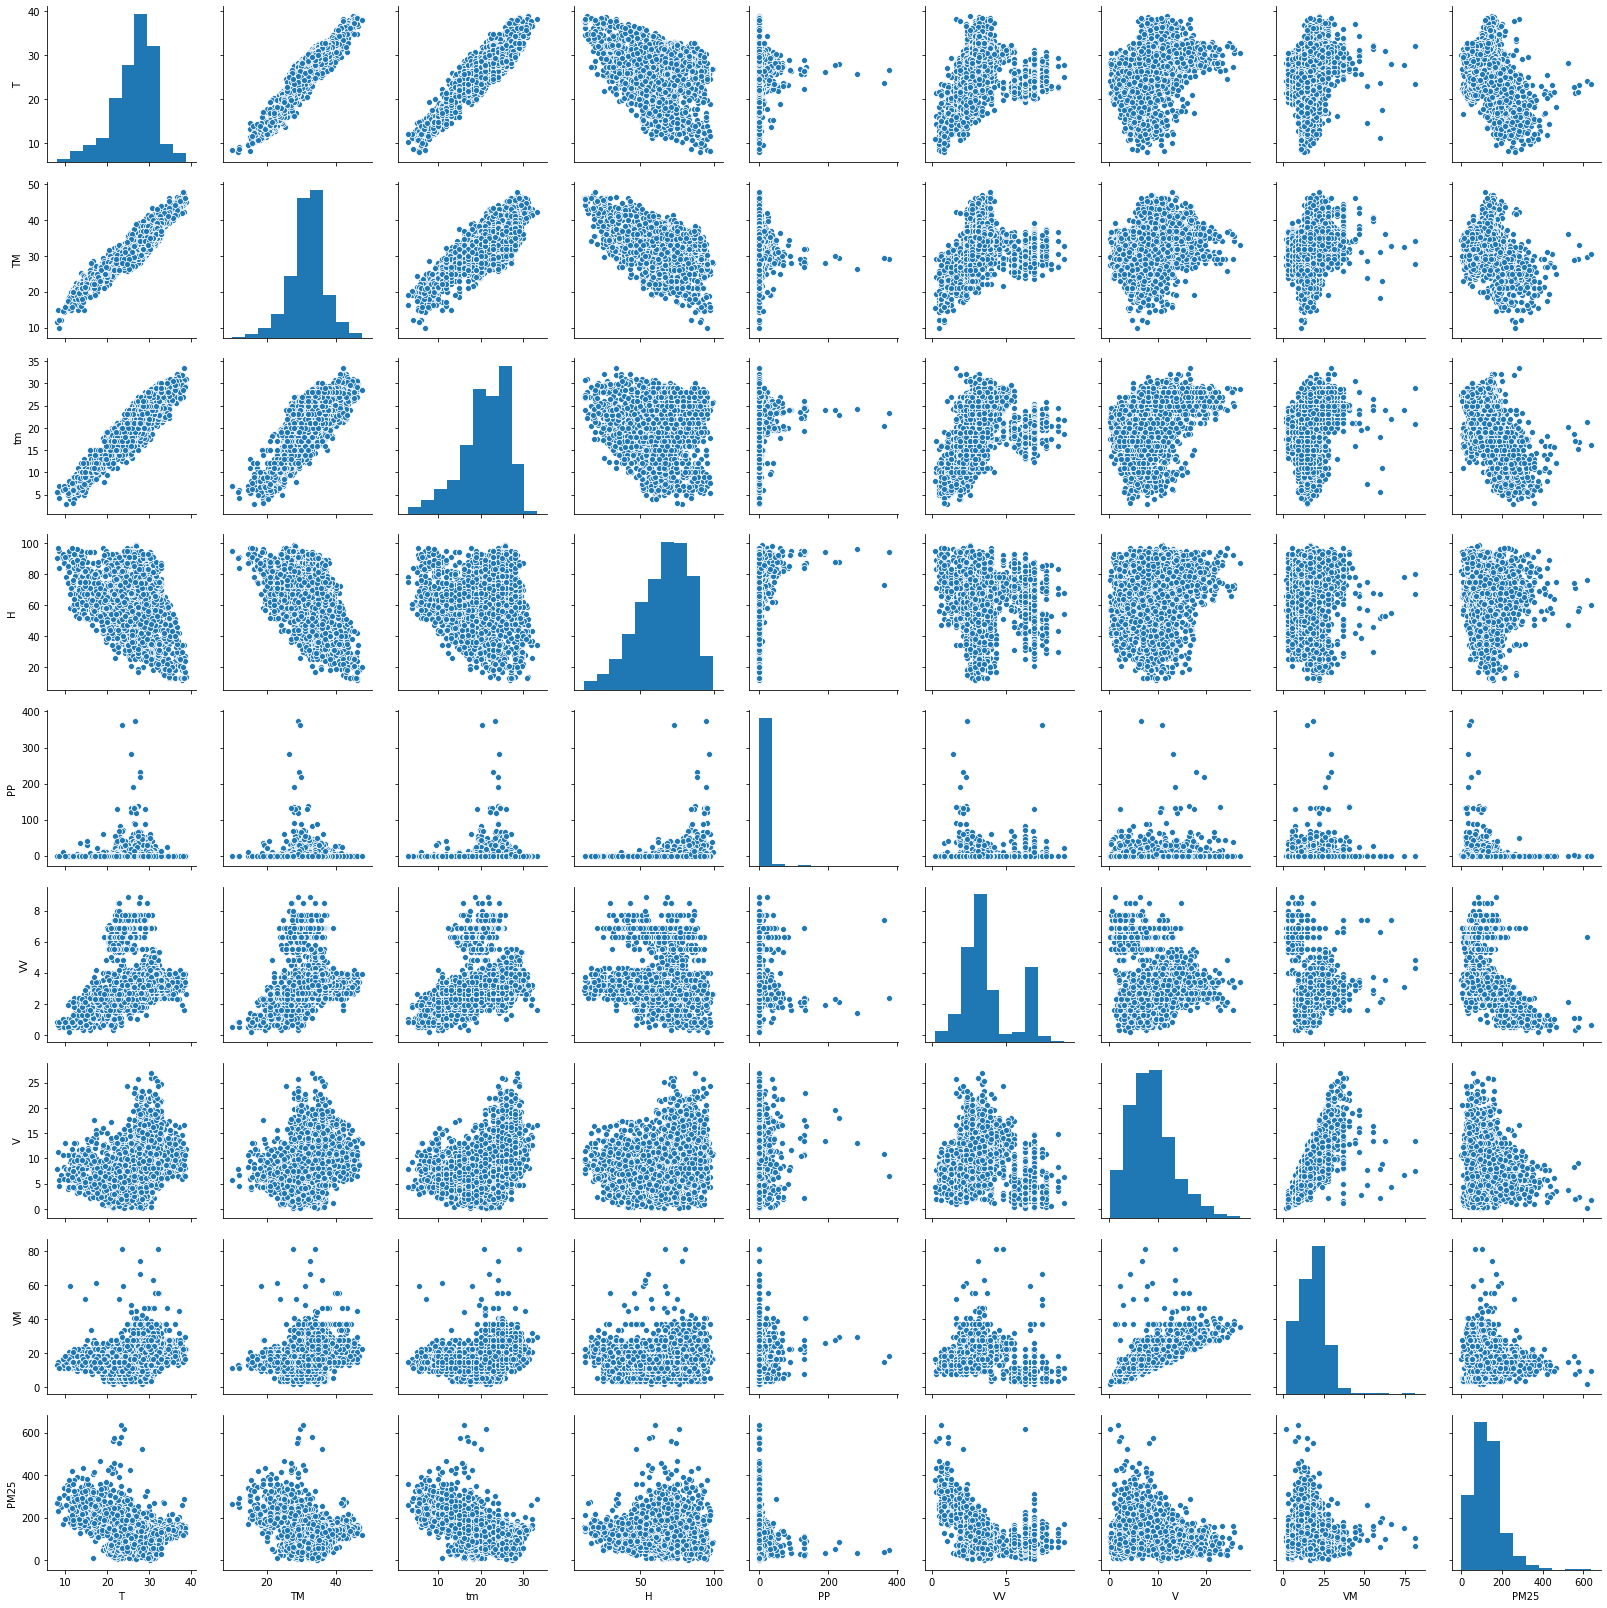

In [12]:
sns.pairplot(df)

In [13]:
X= df.drop("PM25",axis=1)
y= df['PM25']

## Model 1: Linear regression model

In [14]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
df.columns

Index(['T', 'TM', 'tm', 'H', 'PP', 'VV', 'V', 'VM', 'PM25'], dtype='object')

In [16]:
seed = 50
test_size = 0.20
trainingSet, testingSet = train_test_split(df, test_size = test_size, random_state = seed)

In [17]:

lm = smf.ols(formula = "PM25 ~ tm+H+VV+V", data = trainingSet)

model_1 = lm.fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM25   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     885.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:06:48   Log-Likelihood:                -15595.
No. Observations:                2956   AIC:                         3.120e+04
Df Residuals:                    2951   BIC:                         3.123e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    391.9277      4.959     79.036      0.0

In [18]:
train_pred1=model_1.predict(trainingSet[['tm', 'H', 'VV', 'V']])

In [19]:
print("Score based on training data:")
print("Adjusted R-squared : {}%".format((model_1.rsquared_adj*100).round(2)))
print("RMSE :", np.sqrt(mean_squared_error(trainingSet.PM25,train_pred1)).round(2))

Score based on training data:
Adjusted R-squared : 54.49%
RMSE : 47.31


In [20]:
test_pred1=model_1.predict(testingSet[['tm', 'H', 'VV', 'V']])

In [21]:
print("Score based on testing data:")
print("Adjusted R-squared : {}%".format((model_1.rsquared_adj*100).round(2)))
print("RMSE :", np.sqrt(mean_squared_error(testingSet.PM25,test_pred1)).round(2))

Score based on testing data:
Adjusted R-squared : 54.49%
RMSE : 43.46


In [22]:
import pickle

In [23]:
file = open('AQI_LR_model.pkl', 'wb')
pickle.dump(model_1, file)

## Model 2: Random Forest

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rfr= RandomForestRegressor()
model_2=rfr.fit(X_train,y_train)

In [27]:
print("Score based on training data:")
print("Adjusted R-squared : {}%".format((model_2.score(X_train,y_train)*100).round(2)))

Score based on training data:
Adjusted R-squared : 96.24%


In [28]:
test_pred2 = model_2.predict(X_test)

In [29]:
print("Score based on testing data:")
print("Adjusted R-squared : {}%".format((model_2.score(X_test,y_test)*100).round(2)))
print("RMSE :", np.sqrt(mean_squared_error(test_pred2,y_test)).round(2))


Score based on testing data:
Adjusted R-squared : 80.55%
RMSE : 30.28


In [30]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_2,X,y,cv=5)

In [31]:
score.mean()

0.5585749201685937

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [34]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [35]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=True, random_state = 50, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=50, verbose=True)

In [36]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 44,
 'bootstrap': True}

In [37]:
model_22 = RandomForestRegressor(**{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 44,
 'bootstrap': True})

In [38]:
model_22.fit(X_train,y_train)

RandomForestRegressor(max_depth=66, min_samples_leaf=4, n_estimators=1200)

In [39]:
test_pred22 = model_22.predict(X_test)

In [40]:
print("Score based on testing data:")
print("Adjusted R-squared : {}%".format((model_22.score(X_test,y_test)*100).round(2)))
print("RMSE :", np.sqrt(mean_squared_error(test_pred22,y_test)).round(2))

Score based on testing data:
Adjusted R-squared : 80.6%
RMSE : 30.24


In [42]:
file = open('AQI_RFR_model.pkl', 'wb')
pickle.dump(model_22, file)